In [4]:
import networkx as nx
from networkx.algorithms.traversal.depth_first_search import dfs_tree
from networkx.readwrite import json_graph

In [5]:
import json 
import numpy as np
import re

In [6]:
from scipy import sparse, io
import os
import json
import joblib
import csv

import collections
from collections import Counter
import itertools



In [4]:
def rand_code_snippets(G, n, last_node_id=0, dmin=10, dmax=128, mode='dfs'):
    snippets = []; node_id = last_node_id
    while (len(snippets) < n) and (node_id < G.number_of_nodes()):
        if mode == 'dfs':
            hub_ego = dfs_tree(G, node_id)
        else:
            hub_ego = nx.ego_graph(G, node_id, radius=3)

        neighbours = list(hub_ego.nodes())
        if (len(neighbours) > dmin) and (len(neighbours) < dmax):
            snippets.append(neighbours)
        node_id += 1
    return snippets, node_id

In [7]:
# Build vocab

filename = "data/js-150k/programs_training_valid.json"
global_id = 0
n_edges = 0
snippet_count = 0
var_map = {}
name = 'test_js'
max_len = 128
out_path = 'data/js-150k/data'
if not os.path.exists(out_path):
    os.makedirs(out_path)
vocab = set()

with open(filename, 'r', encoding="ISO-8859-1") as f:
    for idx, line in enumerate(f):
        data = json.loads(line[:-6]+"]")
        for r in data:
            if type(r) == int:
                break
            from_node = r['id']
            if r['type'] in ['Identifier', 'Property']:
                if r.get('value', None) is not None:
                    if len(w.split(' ')) > 1:
                        w = 'Property'
                    else:
                        w = str(r['value'])
                    var_map[str(from_node)] = w
                else:
                    w = r['type']
                    break
            else:
                w = r['type']
                

            vocab.add(w)
        #if idx > 1000:
        #    break

JSONDecodeError: Expecting ',' delimiter: line 1 column 10285 (char 10284)

In [9]:
len(vocab)

978130

In [11]:
a = {'',
 'isSafari2',
 '57571',
 'FigureRotateCommand',}
len(a)

4

In [12]:
len(var_map.values())

624730

In [13]:
C = Counter(var_map.values())
C_filt = {x : C[x] for x in C if C[x] >= 5}

In [14]:
len(C_filt.keys())

10685

In [21]:
C['WhileStatement']

0

In [22]:
filename = "data/js-150k/programs_training_valid.json"
global_id = 0
n_edges = 0
snippet_count = 0
#var_map = {}
name = 'test_js'
max_len = 128
out_path = 'data/js-150k/data'
if not os.path.exists(out_path):
    os.makedirs(out_path)
#vocab = set()

with open(filename, 'r', encoding="ISO-8859-1") as f:
    for idx, line in enumerate(f):
        data = json.loads(line[:-6]+"]")
        G=nx.Graph()
        row = ["[CLS]"]; row_order = ["[CLS]"]
        for r in data:
            #print(r)
            if type(r) == int:
                break
            from_node = r['id']
            if r['type'] in ['Identifier', 'Property']:
                if r.get('value', None) is not None:
                    if (len(w.split(' ')) > 1):
                        w = r['type']
                    elif (C[r['value']] >= 5):
                        w = str(r['value'])
                    else: 
                        w = r['type']
                    #var_map[str(from_node)] = w
                else:
                    break
            else:
                w = r['type']
            
            if w == 'this':
                print(w, r)
                
            # Split the words
            #for split_w in full_split(w):
            #    row.append(split_w)
            #    vocab.add(split_w)
            #    
            #    print(w, split_w)
            row.append(w)
            #vocab.add(w)
#            if len(w.split(' ')) > 1:
#                print(r, w)
            for to_node in r.get('children', []):
                n_edges += 1
                G.add_edge(from_node, to_node)
                
        if G.number_of_nodes() < max_len:
            # Save tk
            with open(os.path.join(out_path, str(snippet_count)+"_"+name+'_tk.txt'), 'a') as f:
                f.write(' '.join(row))
                sep='\n\n'
                f.write(sep)
                    
            # Save adj
            G_u = G.to_undirected()
            adj = nx.adj_matrix(G_u).todense()
            
            final = np.zeros((max_len,max_len), dtype=int)
            final[1:adj.shape[0]+1, 1:adj.shape[1]+1] = adj
            final += np.eye(max_len, dtype=int)
            final[:,0] = np.ones(max_len)
            final[0,:] = np.ones(max_len)
            
            m = sparse.csr_matrix(final)
            sparsedir = os.path.join(out_path, 'adj')
            if not os.path.exists(sparsedir):
                os.makedirs(sparsedir)
            io.mmwrite(os.path.join(sparsedir, str(snippet_count)+"_"+name+"_adj.mtx"), m)
            snippet_count += 1
        #if idx > 1000:
        #    break

JSONDecodeError: Expecting ',' delimiter: line 1 column 10285 (char 10284)

In [23]:
len(vocab)

978130

In [24]:
vocab

{'',
 'isSafari2',
 '57571',
 'FigureRotateCommand',
 'vnd.openxmlformats-officedocument.spreadsheetml.template',
 'renderRestExpression',
 'nNh',
 '_betweenX',
 'REGISTERWORDENUMPROCW',
 'getUserPrefFile',
 'getDefUrl',
 'pathContacts',
 'ð\x9d\x92¦',
 '_onPositionFired',
 'ParamFirst',
 'ï·¼',
 'sizers',
 'CONCURRENCY',
 'buildSkuTable',
 'iframeChild',
 'GitRepoListExplorer',
 '_zx',
 'content-Type',
 'yyn152',
 'reference_check',
 'findTick',
 'oEndBlock',
 'local_callback',
 'allAggregates',
 'tmpSection',
 'isUIFourJoint',
 'getNewOverlaps',
 'memcmp',
 'copyTo',
 'unpredictable',
 'versionTag',
 '_pushback',
 'RECURRENCE_MONTLY',
 'b64_6bit',
 'LIF3JA9R94A3775',
 'getClaims',
 'pad after sign with currency',
 'psychoboost',
 'mixinShowable',
 '&angzarr;',
 'NewShapeTrack',
 'windowUnloaded',
 'highlightObject',
 'getAttributeType',
 'updateTabsOrder',
 '$BANG',
 'atDepth',
 'finishHandlerCalled',
 'transFn',
 'create_dialog',
 'getCellData',
 'getRandomCandidate',
 'isPreviewVis

In [25]:
snippet_count

36618

In [26]:
len(list(C_filt.keys()))

10685

In [27]:
with open(os.path.join(out_path, 'js-vocab.txt'), 'a') as f:
    f.write("[PAD]\n")
    f.write("[UNK]\n")
    f.write("[CLS]\n")
    f.write("[SEP]\n")
    f.write("[MASK]\n")
    voc = list(C_filt.keys())
    for v in voc:
        f.write(v.lower())
        f.write('\n')
    print("Vocabulary length: ", len(voc)+5)

Vocabulary length:  10690


In [28]:
Counter(var_map.values()).most_common(100)

[('HEAP32', 20415),
 ('__label__', 17600),
 ('ol', 13674),
 ('goog', 12344),
 ('prototype', 9581),
 ('STRING_TABLE', 9068),
 ('i', 8434),
 ('allocate', 6444),
 ('ALLOC_STATIC', 6373),
 ('name', 5675),
 ('type', 5167),
 ('length', 4573),
 ('options', 4484),
 ('description', 4375),
 ('x', 4262),
 ('tempDoubleI32', 4125),
 ('value', 3894),
 ('node', 3244),
 ('y', 2929),
 ('n', 2907),
 ('undef', 2596),
 ('format', 2550),
 ('require', 2514),
 ('_color_lib', 2493),
 ('source', 2488),
 ('exportProperty', 2440),
 ('c', 2347),
 ('e', 2313),
 ('style', 2230),
 ('tempDoubleF64', 2080),
 ('occurrence', 1881),
 ('i1', 1794),
 ('that', 1667),
 ('a', 1637),
 ('jQuery', 1548),
 ('elem', 1517),
 ('push', 1504),
 ('assert', 1488),
 ('tempInt', 1482),
 ('HEAP8', 1421),
 ('math', 1419),
 ('p', 1384),
 ('cm', 1370),
 ('b', 1350),
 ('$2', 1329),
 ('$1', 1323),
 ('Math', 1312),
 ('AST$', 1293),
 ('exports', 1254),
 ('index', 1254),
 ('geom', 1253),
 ('t', 1214),
 ('data', 1188),
 ('width', 1187),
 ('other', 

In [8]:
flatten = lambda x: [item for sublist in x for item in sublist]
cc_split = lambda x: re.sub('(?!^)([A-Z][a-z]+)', r' \1', x).split()

In [9]:
def full_split(v):
    sp = cc_split(v)
    sp = flatten([ss.split('_') for ss in sp])
    sp = flatten([ss.split('-') for ss in sp])
    sp = flatten([ss.split('/') for ss in sp])
    sp = flatten([ss.split('$') for ss in sp])
    return sp


In [10]:
sub_vocab = set()
for v in vocab:
    sp = cc_split(v)
    sp = flatten([ss.split('_') for ss in sp])
    sp = flatten([ss.split('-') for ss in sp])
    sp = flatten([ss.split('/') for ss in sp])
    sp = flatten([ss.split('$') for ss in sp])

    for s in sp:
        sub_vocab.add(s)

In [11]:
len(sub_vocab)

65569

In [12]:
sub_vocab

{'',
 'cont',
 'desc1',
 'Contexts',
 'swfpath',
 'Variable',
 'oldURI',
 'Step',
 'vnd.dpgraph',
 'o79',
 'pinname',
 'bdbw',
 'Finnish',
 'others',
 'capitalized',
 'Uri',
 'xlink',
 '717',
 'Charcode',
 'ag',
 '0xC01E0581',
 'TransferCB',
 'myelem',
 'vends',
 'remove',
 'lad',
 'Propert',
 'runtimes',
 'fxs',
 'drawmode',
 'EDITMODE',
 'asis',
 'ï½\x8b',
 'UDT',
 '0x00000BC4',
 'retry',
 'minifiers',
 'intersectX',
 'Ext.viewport.',
 'kendo',
 'dirtyZ',
 'shn',
 'Im',
 'stxt',
 'Atomics',
 'Zdl',
 'escaper',
 'scallback',
 '690',
 'wday',
 'weaker',
 'III',
 'ongamepaddisconnected',
 'idents',
 'difflib',
 'yaw',
 'Nc',
 'exclusion',
 'Affix',
 'stylizer',
 'Cnonce',
 'featuresadded',
 'support',
 'Tasks',
 'this3',
 'Î\x94',
 'unreplaced',
 '588',
 'badge',
 'ab',
 'Jsercy',
 'selecttoend',
 '#I',
 'KIT',
 'mapsize',
 'Ç«',
 'displayname',
 'closers',
 'Proportional',
 'postedby',
 '0x00000128',
 'bst',
 'enableE10s',
 'end2',
 'iconshadow',
 'Choice',
 'vnd.crick.clicker.keyboard

In [13]:
n_edges

18189888

In [14]:
G.number_of_edges(), G.number_of_nodes()

(397, 398)

In [61]:
line

'[ { "id":0, "type":"Program", "children":[1,3,20,25,61] }, { "id":1, "type":"ExpressionStatement", "children":[2] }, { "id":2, "type":"LiteralString", "value":"use strict" }, { "id":3, "type":"VariableDeclaration", "children":[4,8,12,16] }, { "id":4, "type":"VariableDeclarator", "value":"jsonFile", "children":[5] }, { "id":5, "type":"CallExpression", "children":[6,7] }, { "id":6, "type":"Identifier", "value":"require" }, { "id":7, "type":"LiteralString", "value":"jsonfile" }, { "id":8, "type":"VariableDeclarator", "value":"fs", "children":[9] }, { "id":9, "type":"CallExpression", "children":[10,11] }, { "id":10, "type":"Identifier", "value":"require" }, { "id":11, "type":"LiteralString", "value":"fs" }, { "id":12, "type":"VariableDeclarator", "value":"mkdir", "children":[13] }, { "id":13, "type":"CallExpression", "children":[14,15] }, { "id":14, "type":"Identifier", "value":"require" }, { "id":15, "type":"LiteralString", "value":"./mkdir" }, { "id":16, "type":"VariableDeclarator", "va

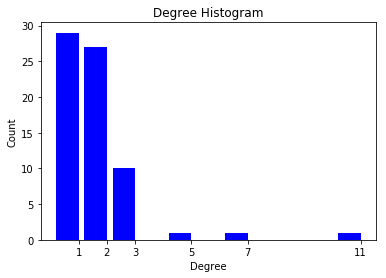

In [50]:
import collections
import matplotlib.pyplot as plt
%matplotlib inline 

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items());

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg]);
ax.set_xticklabels(deg);

In [51]:
degreeCount

Counter({11: 1, 7: 1, 5: 1, 3: 10, 2: 27, 1: 29})

In [52]:
n_edges

68

In [58]:
token_types = set()

with open(filename, 'r') as f:
    try:
        for idx, line in enumerate(f):
            data = json.loads(line[:-6]+"]")
            for r in data:
                if type(r) == int:
                    break
                token_types.add(r['type'])
            #break
    except:
        print(idx,line)

2843 [ { "id":0, "type":"Program", "children":[1,3,20,25,61] }, { "id":1, "type":"ExpressionStatement", "children":[2] }, { "id":2, "type":"LiteralString", "value":"use strict" }, { "id":3, "type":"VariableDeclaration", "children":[4,8,12,16] }, { "id":4, "type":"VariableDeclarator", "value":"jsonFile", "children":[5] }, { "id":5, "type":"CallExpression", "children":[6,7] }, { "id":6, "type":"Identifier", "value":"require" }, { "id":7, "type":"LiteralString", "value":"jsonfile" }, { "id":8, "type":"VariableDeclarator", "value":"fs", "children":[9] }, { "id":9, "type":"CallExpression", "children":[10,11] }, { "id":10, "type":"Identifier", "value":"require" }, { "id":11, "type":"LiteralString", "value":"fs" }, { "id":12, "type":"VariableDeclarator", "value":"mkdir", "children":[13] }, { "id":13, "type":"CallExpression", "children":[14,15] }, { "id":14, "type":"Identifier", "value":"require" }, { "id":15, "type":"LiteralString", "value":"./mkdir" }, { "id":16, "type":"VariableDeclarator",

In [2]:
token_types = {'ArrayAccess',
 'ArrayExpression',
 'AssignmentExpression',
 'BinaryExpression',
 'BlockStatement',
 'BreakStatement',
 'CallExpression',
 'CatchClause',
 'ConditionalExpression',
 'ContinueStatement',
 'DoWhileStatement',
 'EmptyStatement',
 'ExpressionStatement',
 'ForInStatement',
 'ForStatement',
 'FunctionDeclaration',
 'FunctionExpression',
 'Identifier',
 'IfStatement',
 'LabeledStatement',
 'LiteralBoolean',
 'LiteralNull',
 'LiteralNumber',
 'LiteralRegExp',
 'LiteralString',
 'LogicalExpression',
 'MemberExpression',
 'NewExpression',
 'ObjectExpression',
 'Program',
 'Property',
 'ReturnStatement',
 'SequenceExpression',
 'SwitchCase',
 'SwitchStatement',
 'ThisExpression',
 'ThrowStatement',
 'TryStatement',
 'UnaryExpression',
 'UpdateExpression',
 'VariableDeclaration',
 'VariableDeclarator',
 'WhileStatement'}

In [4]:
for k in token_types:
    print(k.lower())
    

assignmentexpression
literalregexp
binaryexpression
switchcase
updateexpression
literalnull
throwstatement
trystatement
variabledeclarator
identifier
program
ifstatement
expressionstatement
callexpression
functionexpression
dowhilestatement
labeledstatement
unaryexpression
functiondeclaration
emptystatement
arrayaccess
whilestatement
objectexpression
literalboolean
newexpression
memberexpression
catchclause
continuestatement
conditionalexpression
forinstatement
thisexpression
forstatement
property
returnstatement
arrayexpression
sequenceexpression
blockstatement
breakstatement
literalstring
literalnumber
logicalexpression
switchstatement
variabledeclaration


In [54]:
var_map

{'18': 'test',
 '20': 'test',
 '24': 'enterFunc',
 '28': 'printBugNumber',
 '29': 'BUGNUMBER',
 '32': 'printStatus',
 '33': 'summary',
 '36': 'jit',
 '40': '__proto__',
 '42': '✖',
 '46': 'f',
 '50': 'eval',
 '54': 'f',
 '57': 'jit',
 '61': 'reportCompare',
 '62': 'expect',
 '63': 'actual',
 '64': 'summary',
 '67': 'exitFunc'}